# Rotation CIFAR Plot

This notebook takes the results of rotation_cifar.ipynb and plots the backward transfer efficiency against the angle of rotation for the images in **CIFAR-100** (https://www.cs.toronto.edu/~kriz/cifar.html)

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Choose which algorithms to plot
alg_name = ['L2F']#['L2N','L2F','LwF','EWC','Online_EWC','SI']
angles = np.arange(0,180,1)
tes = [[] for _ in range(len(alg_name))]

for algo_no,alg in enumerate(alg_name):
    for angle in angles:
        if alg=='L2F':
            orig_error, transfer_error = pickle.load(
                open("results/angle_" + str(angle) + "_uf.pickle", "rb")
                )
            tes[algo_no].append(orig_error / transfer_error)
        elif alg=='L2N':
            orig_error, transfer_error = pickle.load(
                open("results/angle_" + str(angle) + "_dnn.pickle", "rb")
                )
            tes[algo_no].append(orig_error / transfer_error)
        else:
            orig_error, transfer_error = pickle.load(
                open("benchmarking_algorthms_result/" +alg+'_'+str(angle) + ".pickle", "rb")
                )
            tes[algo_no].append(orig_error / transfer_error)

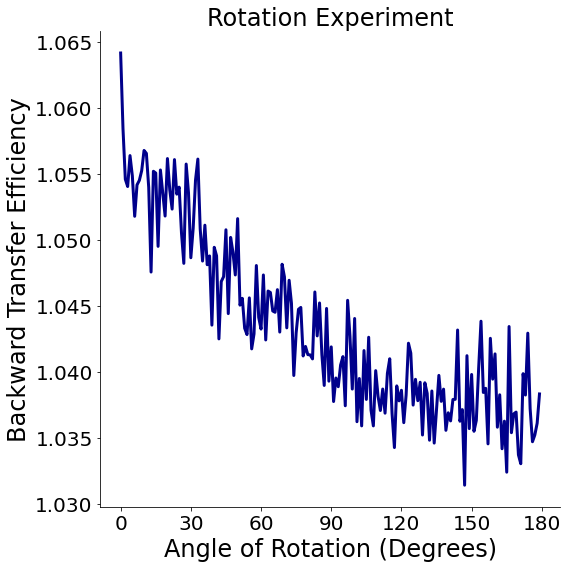

In [3]:
#Choose which color to make each algorithm's results
clr = ["#00008B"]#["#00008B", "#e41a1c", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))
fig, ax = plt.subplots(1,1, figsize=(8,8))

#Plot the data
for alg_no,alg in enumerate(alg_name):
    if alg_no<2:
        ax.plot(angles,tes[alg_no], c=c[alg_no], label=alg_name[alg_no], linewidth=3)
    else:
        ax.plot(angles,tes[alg_no], c=c[alg_no], label=alg_name[alg_no])

#ax.set_yticks([.9,.95, 1, 1.05,1.11])
#ax.set_ylim([0.85,1.13])
ax.set_xticks([0,30,60,90,120,150,180])
ax.tick_params(labelsize=20)
ax.set_xlabel('Angle of Rotation (Degrees)', fontsize=24)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=24)
ax.set_title("Rotation Experiment", fontsize = 24)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
plt.tight_layout()
#x.legend(fontsize = 24)
plt.show()